In [8]:
import re

# Read the contents of the file
with open('test.txt', 'r') as file:
    content = file.readlines()

# Initialize lists for storing total rewards and single rewards
total_rewards = []
single_rewards = []

# Loop through each line in the file
for line in content:
    # Split the line by commas
    parts = line.split(',')
    
    # Extract the total reward (between the first set of square brackets)
    total_reward = float(parts[0].split('[')[1].split(']')[0])
    total_rewards.append(total_reward)
    
    # Extract the single reward (between the last set of square brackets)
    single_reward = float(parts[-1].split('[')[1].split(']')[0])
    single_rewards.append(single_reward)

# Output the arrays
print("Total Rewards:", len(total_rewards))
print("Single Rewards:", len(single_rewards))

Total Rewards: 1000
Single Rewards: 1000


In [9]:
# Get the stats for the total rewards
total_rewards_mean = sum(total_rewards) / len(total_rewards)
total_rewards_median = total_rewards[len(total_rewards) // 2]
total_rewards_min = total_rewards[0]
total_rewards_max = total_rewards[-1]

print("Total Rewards Mean:", total_rewards_mean, "Median:", total_rewards_median, "Min:", total_rewards_min, "Max:", total_rewards_max)

Total Rewards Mean: 54.0948462921 Median: 57.41153 Min: 53.50507 Max: 61.110603


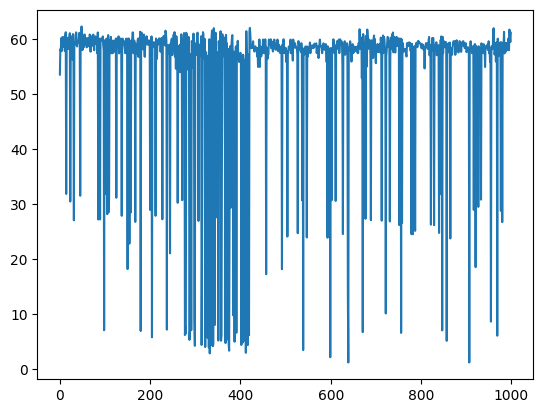

In [10]:
# Plot the rewards
import matplotlib.pyplot as plt
plt.plot(total_rewards, label='Total Rewards')

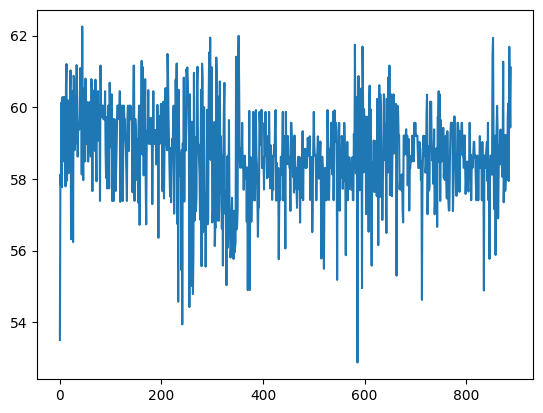

In [13]:
# Remove the outliers
total_rewards_no_outliers = [x for x in total_rewards if x > 40]

# Plot the rewards without the outliers with smoothing
plt.plot(total_rewards_no_outliers, label='Total Rewards (No Outliers)')


In [18]:
# group the rewards
grouped_rewards = {}
for reward in single_rewards:
    if reward not in grouped_rewards:
        grouped_rewards[reward] = 0
    grouped_rewards[reward] += 1
print(grouped_rewards)


{20.0: 889, -10.0: 104, 3.5569482: 1, 2.7202187: 1, 2.7132359: 1, 4.8007293: 1, 1.7083424: 1, 2.8726513: 1, 4.1263456: 1}


## ______________________________________________________________________________________________

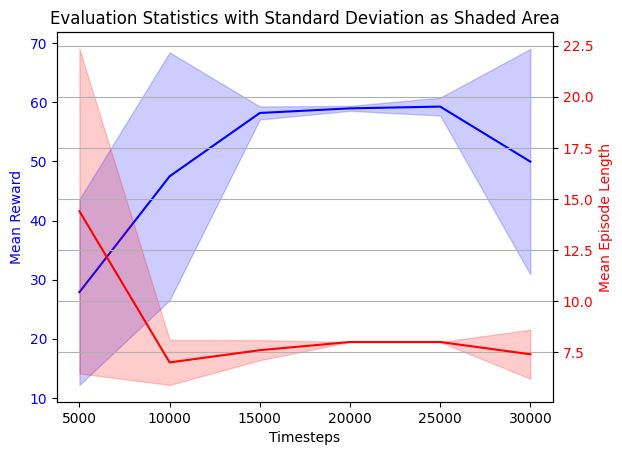

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Data from the evaluations
timesteps = np.array([5000, 10000, 15000, 20000, 25000, 30000])
mean_episode_rewards = np.array([27.89, 47.49, 58.21, 58.99, 59.29, 49.97])
std_episode_rewards = np.array([15.71, 20.97, 1.10, 0.42, 1.51, 19.08])
mean_episode_lengths = np.array([14.4, 7.0, 7.6, 8.0, 8.0, 7.4])
std_episode_lengths = np.array([7.94, 1.10, 0.49, 0.00, 0.00, 1.20])

# Plotting
fig, ax1 = plt.subplots()

# Plotting the mean rewards
ax1.set_xlabel('Timesteps')
ax1.set_ylabel('Mean Reward', color='blue')
ax1.plot(timesteps, mean_episode_rewards, 'b-', label='Mean Reward')
ax1.fill_between(timesteps, mean_episode_rewards - std_episode_rewards, mean_episode_rewards + std_episode_rewards, color='blue', alpha=0.2)
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis for the episode lengths
ax2 = ax1.twinx()
ax2.set_ylabel('Mean Episode Length', color='red')
ax2.plot(timesteps, mean_episode_lengths, 'r-', label='Mean Episode Length')
ax2.fill_between(timesteps, mean_episode_lengths - std_episode_lengths, mean_episode_lengths + std_episode_lengths, color='red', alpha=0.2)
ax2.tick_params(axis='y', labelcolor='red')

# Title and grid
plt.title('Evaluation during training')
plt.grid(True)

# Display the plot
plt.show()
